# LetsGrowMore - October 2021

# Data Science Internship

# Author: EMO SIANI LOIC

## Intermediate Level Task 2 : Prediction Using Decision Tree Algorithm

### Task Goal: Create the Decision Tree Classifier and visualize it graphically

### 1- Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2- Loading dataset

In [20]:
iris_df = pd.read_csv('Iris.csv')

In [21]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
iris_df.drop(['Id'], axis=1, inplace=True)

In [23]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values
y = iris_df.iloc[:,-1].values

In [27]:
X.shape

(150, 4)

In [28]:
y.shape

(150,)

### 3- Exploratory Data Analysis

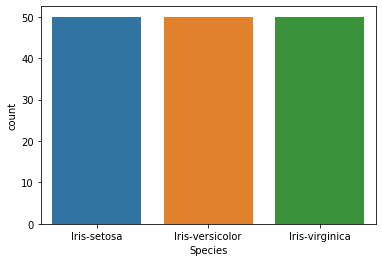

In [29]:
sns.countplot(iris['Species'])

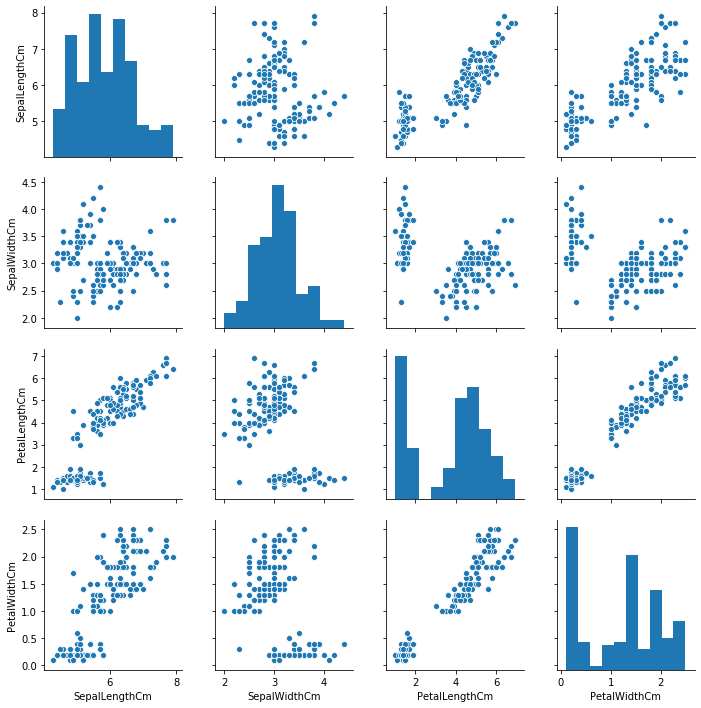

In [30]:
sns.pairplot(iris)

### 4- Splitting our dataset into training data and test data

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [32]:
LabelE = LabelEncoder()
y= LabelE.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

### 5- Defining our Decision Tree Algorithm

In [34]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
# Train our model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
# Training score
dtree.score(X_train,y_train)

1.0

### 5- Making Predictions of our test data

In [38]:
predictions = dtree.predict(X_test)

In [39]:
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

**Comparing Actual Vs Predicted**

In [40]:
comparaison = pd.DataFrame({"Actual":y_test,"Predicted":predictions})

In [41]:
comparaison.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


### 6 - Accuracy of our model

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print("the score on the test data is {}".format(accuracy_score(y_test,predictions)))

the score on the test data is 1.0


### 7- Visualising the Decision Tree to understand it better.

In [26]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [44]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

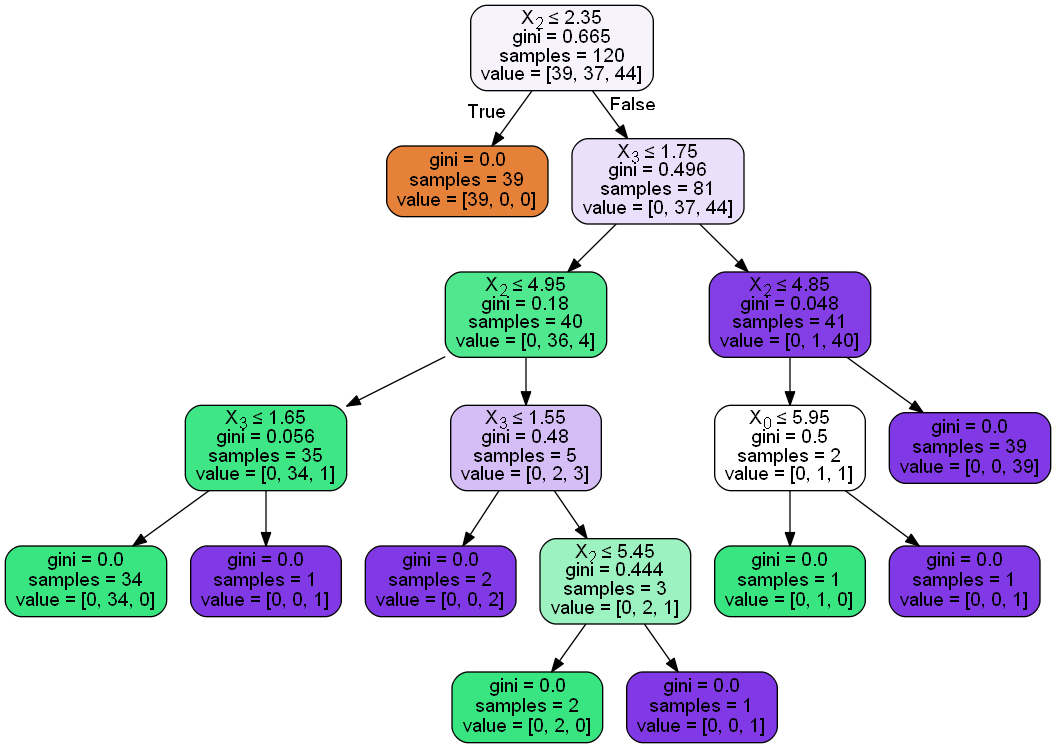

In [45]:
# Import necessary libraries for graph viz
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

# Visualize the graph
svg_graph = graph.create_svg()
svg = open('entropy_tree.svg', 'wb')
svg.write(svg_graph)
svg.close()

Image(graph.create_png())

### 8- Prediction of a new entry

In [46]:
X_new = np.array([4.9,3.2,0.9,0.35]).reshape(1,-1)

In [47]:
pred = dtree.predict(X_new)

In [48]:
print("The new entry belongs to class {}.".format(pred[0]))

The new entry belongs to class 0.
